In [2]:
import numpy as np
import matplotlib.pyplot as plt

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many LOCAL minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

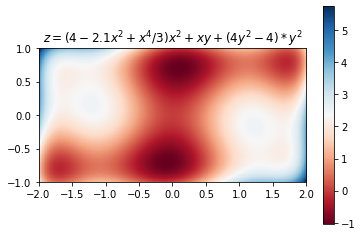


########### THE GIVEN FUNCTION HAS 2 GLOBAL MINIMA ###########

function at  [-0.08984202  0.7126564 ]  takes the value  -1.0316284534898768
function gradient x at  [-0.08984202  0.7126564 ]  takes the values  -9.336976114493467e-08
function gradient y at  [-0.08984202  0.7126564 ]  takes the values  -6.325805301798937e-08
function at  [ 0.08984201 -0.71265641]  takes the value  -1.0316284534898765
function gradient x at  [ 0.08984201 -0.71265641]  takes the values  -2.022674849833095e-08
function gradient y at  [ 0.08984201 -0.71265641]  takes the values  -1.6988834755649052e-07

########### THE GIVEN FUNCTION HAS 4 MORE LOCAL MINIMA ###########

function at  [ 1.70360635 -0.79608312]  takes the value  -0.2154638243803454
function gradient x at  [ 1.70360635 -0.79608312]  takes the values  -6.4869222989871744e-06
function gradient y at  [ 1.70360635 -0.79608312]  takes the values  9.74220497251821e-06
function at  [-1.70360637  0.7960831 ]  takes the value  -0.2154638243803133
functi

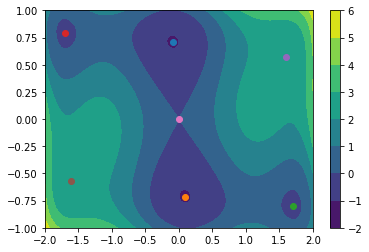

In [6]:
from scipy import optimize
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

# Function with a single input point as passed parameter in order to comply with minimize library function interface
def f(p):
    x, y = p
    return (4 - 2.1*x**2 + x**4/3) * x**2 + x*y + (4 * y**2 - 4) * y**2

def f_gradx(p):
    x, y = p
    return (8 - 8.4 * x**2 + 2.0 * x**4) * x + y

def f_grady(p):
    x, y = p
    return (-8 + 16 * y**2) * y + x

# Restricting variables
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)

# Finding visually the regions
X,Y = meshgrid(x, y) # grid of point
Z = f([X, Y])
im = imshow(Z, extent=[-2, 2, -1, 1], cmap=cm.RdBu) # drawing the function
colorbar(im) # adding the colobar on the right
title('$z=(4-2.1x^2+x^4/3)x^2+xy+(4y^2-4)*y^2 $')
show()

cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)

print('\n########### THE GIVEN FUNCTION HAS 2 GLOBAL MINIMA ###########\n')
x0 = np.array([0.0,0.6])
res = optimize.minimize(f, x0)
print('function at ', res.x, ' takes the value ', res.fun)
print('function gradient x at ', res.x, ' takes the values ', f_gradx(res.x))
print('function gradient y at ', res.x, ' takes the values ', f_grady(res.x))
plt.scatter(res.x[0], res.x[1])

x0 = -x0
res = optimize.minimize(f, x0)
print('function at ', res.x, ' takes the value ', res.fun)
print('function gradient x at ', res.x, ' takes the values ', f_gradx(res.x))
print('function gradient y at ', res.x, ' takes the values ', f_grady(res.x))
plt.scatter(res.x[0], res.x[1])

print('\n########### THE GIVEN FUNCTION HAS 4 MORE LOCAL MINIMA ###########\n')

x0 =np.array([1.5,-0.8])
res = optimize.minimize(f, x0)
print('function at ', res.x, ' takes the value ', res.fun)
print('function gradient x at ', res.x, ' takes the values ', f_gradx(res.x))
print('function gradient y at ', res.x, ' takes the values ', f_grady(res.x))
plt.scatter(res.x[0], res.x[1])

x0 = -x0
res = optimize.minimize(f, x0)
print('function at ', res.x, ' takes the value ', res.fun)
print('function gradient x at ', res.x, ' takes the values ', f_gradx(res.x))
print('function gradient y at ', res.x, ' takes the values ', f_grady(res.x))
print()
plt.scatter(res.x[0], res.x[1])

# "SLSQP", "Nelder-Mead"

print('\n########### 2 LAST LOCAL MINIMA CAN BE FOUND USING ###########')
print('###########   SLSQP or Nelder-Mead OPTIMIZATION    ###########\n')

x0 =np.array([1.75,0.75])
res = optimize.minimize(f, x0, method='Nelder-Mead')
# Refinement with default optimizer
x0 = res.x
res = optimize.minimize(f, x0)
print('function at ', res.x, ' takes the value ', res.fun)
print('function gradient x at ', res.x, ' takes the values ', f_gradx(res.x))
print('function gradient y at ', res.x, ' takes the values ', f_grady(res.x))
plt.scatter(res.x[0], res.x[1])

x0 = -x0
res = optimize.minimize(f, x0)
print('function at ', res.x, ' takes the value ', res.fun)
print('function gradient x at ', res.x, ' takes the values ', f_gradx(res.x))
print('function gradient y at ', res.x, ' takes the values ', f_grady(res.x))
plt.scatter(res.x[0], res.x[1])

print('\n########### WHEN THE STARTING SEARCH POINT IS (0,0) ###########')
print('########### THE MINIMIZATION FAILS DUE TO ZERO GRADIENT ###########\n')

x0 = np.array([0,0])
res = optimize.minimize(f, x0)
print('function at ', res.x, ' takes the value ', res.fun)
print('function gradient x at ', res.x, ' takes the values ', f_gradx(res.x))
print('function gradient y at ', res.x, ' takes the values ', f_grady(res.x))
plt.scatter(res.x[0], res.x[1])

plt.show()

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

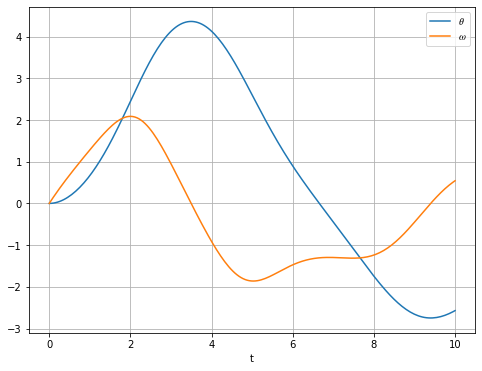

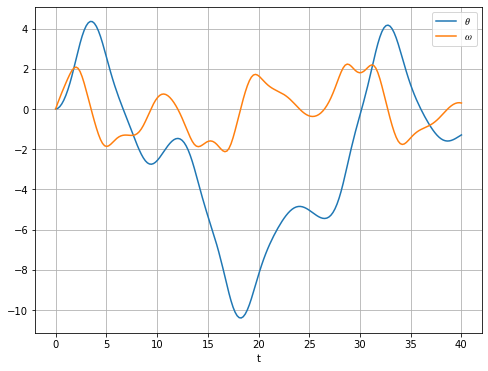

In [7]:
from scipy.integrate import odeint
import math

Xinit = (0, 0)
Q = 2.0
d = 1.5
omega = 0.65
t = np.linspace(0, 10, 200)

# Defining the derivative
def derivative(X, time, Q, d, omega):
    return (X[1], -1/Q*X[1] + math.sin(X[0]) + d*math.cos(omega*time))

# Solving the ODE
X = odeint(derivative, Xinit, t, args=(Q, d, omega))

# Creating the plots
plt.figure(figsize=(8, 6))
plt.plot(t, X[:, 0], label="$𝜃$")
plt.plot(t, X[:, 1], label="$𝜔$")
plt.xlabel('t')
plt.legend(loc='best')
plt.grid('on')
plt.show()


t = np.linspace(0, 40, 200)

X = odeint(derivative, Xinit, t, args=(Q, d, omega))

plt.figure(figsize=(8, 6))
plt.plot(t, X[:, 0], label="$𝜃$")
plt.plot(t, X[:, 1], label="$𝜔$")
plt.xlabel('t')
plt.legend(loc='best')
plt.grid('on')
plt.show()

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

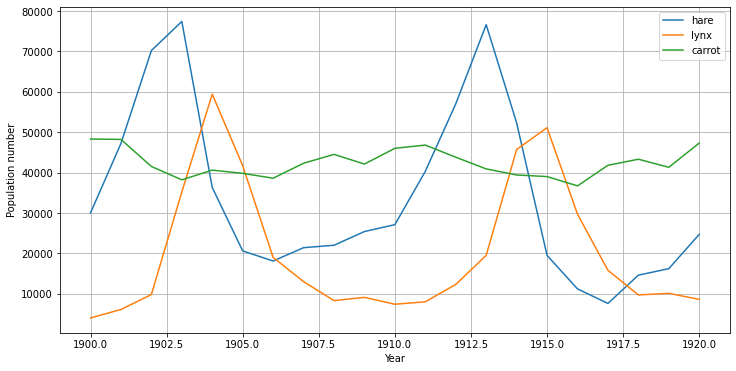

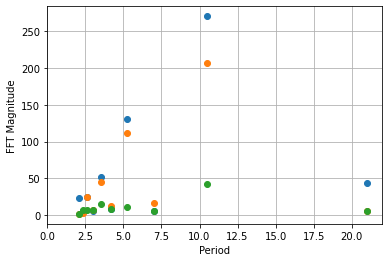

There is probably a period of around  10.5  years


In [9]:
from scipy import fftpack

filepath = "data\populations.txt"
data = np.genfromtxt(filepath)
years = data[:, 0]
populations = data[:, 1:]

plt.figure(figsize=(12, 6))
plt.plot(years, populations)
plt.xlabel('Year')
plt.ylabel('Population number')
plt.legend(['hare', 'lynx', 'carrot'], loc=1)
plt.grid('on')
plt.show()

ft_populations = fftpack.fft(populations, axis=0)
frequencies = fftpack.fftfreq(populations.shape[0], years[1] - years[0])
periods = 1 / frequencies[1:]

plt.figure()
plt.plot(periods, abs(ft_populations[1:,:]) * 1e-3, 'o')
plt.xlim(0, 22)
plt.xlabel('Period')
plt.ylabel('FFT Magnitude')
plt.grid('on')

plt.show()

index = np.argmax(abs(ft_populations[1:,0]))

print('There is probably a period of around ', periods[index], ' years')

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

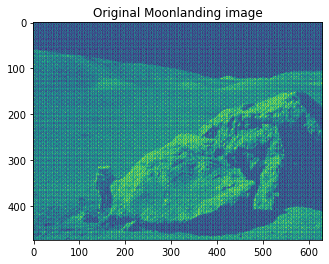

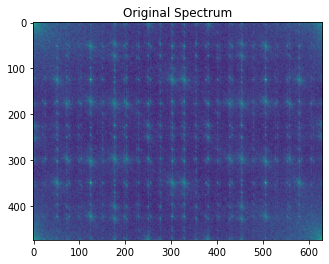

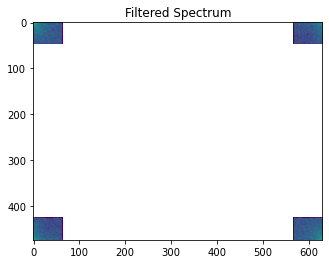

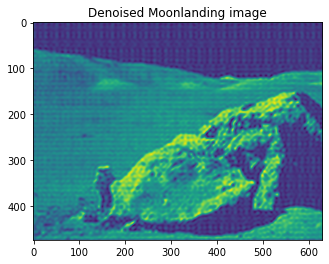

In [12]:
from matplotlib.colors import LogNorm

img = plt.imread("images/moonlanding.png")
plt.imshow(img)
plt.title('Original Moonlanding image')
plt.show()

imgFFT = fftpack.fft2(img)

plt.imshow(np.abs(imgFFT), norm=LogNorm(vmin=5))
plt.title('Original Spectrum')
plt.show()  

#The noise is contained in the high-frequency part of the spectrum, 
# so set some of those components to zero (use array slicing)
keep_fraction = 0.1

imageFFT_denoised = imgFFT.copy()

# Set r and c to be the number of rows and columns of the array
r, c = imageFFT_denoised.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
imageFFT_denoised[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Set to zero all columns with indices between c*keep_fraction and
# c*(1-keep_fraction):
imageFFT_denoised[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.imshow(np.abs(imageFFT_denoised), norm=LogNorm(vmin=5))
plt.title('Filtered Spectrum')
plt.show()

#Apply the inverse Fourier transform to see the resulting image
image_new = fftpack.ifft2(imageFFT_denoised).real

plt.imshow(image_new)
plt.title('Denoised Moonlanding image')
plt.show()